### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns

#### 1. Import the necessary packages - 2.5 marks

In [5]:
#Read user file
user1=pd.read_csv(r'c:\user.csv')
#with columns
dfu= pd.DataFrame(user1, columns=['user id', 'age','gender','occupation','zip code'])
print(dfu)





     user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [109]:
#read data file
data1=pd.read_csv(r'c:\Data.csv')

dfd=pd.DataFrame(data1)
print(dfd)

       user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]


In [110]:
#read item file
item1=pd.read_csv(r'c:\item.csv')

dfi=pd.DataFrame(item1)
print(dfi)

      movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Childrens  Comedy  Crime  ...  Fantasy 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [111]:
#describe and info, shape is not null for user dataframe
dfu.info()
dfu.describe()
dfu.shape
dfu.isna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


,user id,age,gender,occupation,zip code
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
938,False,False,False,False,False
939,False,False,False,False,False
940,False,False,False,False,False
941,False,False,False,False,False


In [112]:
#describe and info, shape is not null for Data dataframe
dfd.info()
dfd.describe()
dfd.shape
dfd.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


,user id,movie id,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
99995,False,False,False,False
99996,False,False,False,False
99997,False,False,False,False
99998,False,False,False,False


In [113]:
#describe and info, shape is not null for Item dataframe
dfi.info()
dfi.describe()
dfi.shape
dfi.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [9]:
#count the genre 
dfiGr= dfi.groupby('unknown').sum()
print(dfiGr)

         movie id  Action  Adventure  Animation  Childrens  Comedy  Crime  \
unknown                                                                     
0         1413763     251        135         42        122     505    109   
1            1373       0          0          0          0       0      0   

         Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
unknown                                                                     
0                 50    725       22         24      92       56       61   
1                  0      0        0          0       0        0        0   

         Romance  Sci-Fi  Thriller  War  Western  
unknown                                           
0            247     101       251   71       27  
1              0       0         0    0        0  


#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [104]:
# Count the movie's that more than one genere
dfires1 = dfi
dfires2 = dfires1.drop(columns=['movie id', 'movie title', 'release date', 'unknown'])
dfisum = dfires2.sum(axis=1)
print(sum(dfisum> 1))

849


#### 5. Find the movies that have more than one genre - 5 marks

In [103]:
#find unknown genre movie
dfidr=dfi
dfidr = dfidr[dfidr.unknown == 1]
print(dfidr)
#drop the movie with unknown genre
dfidr=dfidr.drop



      movie id    movie title release date  unknown  Action  Adventure  \
1371      1373  Good Morning    4-Feb-1971        1       0          0   

      Animation  Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  \
1371          0          0       0      0  ...        0          0       0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
1371        0        0        0       0         0    0        0  

[1 rows x 22 columns]


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [89]:
#merge the user and data dataframes
UniRes=pd.merge(dfu,dfd, on='user id')
print(UniRes)
#merge user,data and item to one dataframe
UniRes1=pd.merge(UniRes,dfi, on ='movie id')
#print dataframe
print(UniRes1)

       user id  age gender  occupation zip code  movie id  rating  timestamp
0            1   24      M  technician    85711        61       4  878542420
1            1   24      M  technician    85711       189       3  888732928
2            1   24      M  technician    85711        33       4  878542699
3            1   24      M  technician    85711       160       4  875072547
4            1   24      M  technician    85711        20       4  887431883
...        ...  ...    ...         ...      ...       ...     ...        ...
99995      943   22      M     student    77841       415       1  888640027
99996      943   22      M     student    77841       219       4  888639575
99997      943   22      M     student    77841       796       3  888640311
99998      943   22      M     student    77841       739       4  888639929
99999      943   22      M     student    77841       391       2  888640291

[100000 rows x 8 columns]
       user id  age gender  occupation zip code  

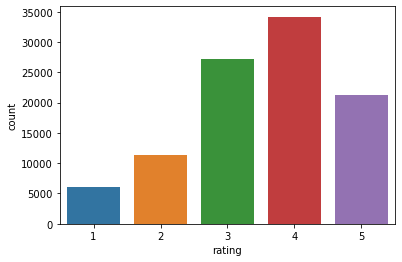

In [88]:
 #countplot distribution for rating
sns.countplot(UniRes1['rating'])


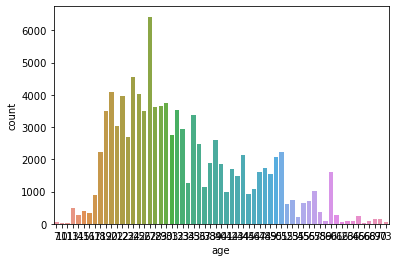

In [87]:
#countplot distribution for age
sns.countplot(UniRes1['age'])

sns.distplot(UniRes1['age'], kde='True')



      Day Month  Year
0      01   Jan  1994
1      01   Jan  1994
2      01   Jan  1994
3      01   Jan  1994
4      01   Jan  1994
...    ..   ...   ...
99986  06   Feb  1998
99987  06   Feb  1998
99988  01   Jan  1998
99989  01   Jan  1994
99990  08   Mar  1996

[99991 rows x 3 columns]


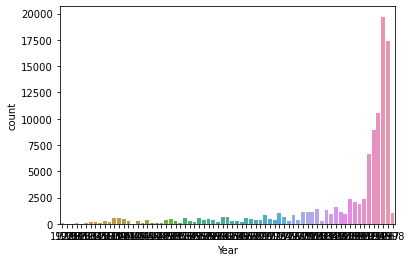

In [86]:
#get the release date column to dataframe
UniRes2= UniRes1[UniRes1.columns[9]]
                 
#slit the release into day,month, year
UniRes3 = pd.DataFrame(UniRes2.str.split('-',2).tolist(),
                                 columns = ['Day','Month','Year'])

#print
print(UniRes3)
#join the split field to the main data frame
UniRes4=UniRes1.join(UniRes3)

#countplot distribution for year
sns.countplot(UniRes4['Year'])

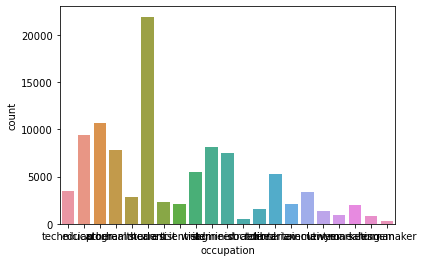

In [85]:
#countplot distribution for occupation
sns.countplot(UniRes4['occupation'])

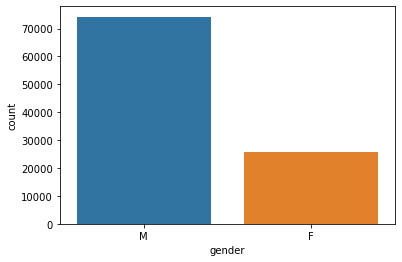

In [84]:
#countplot distribution for gender
sns.countplot(UniRes4['gender'])

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [121]:
# HINT: Use distplot for age and countplot for gender,ratings,occupation. Use lineplot or countplot for release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)

In [112]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [83]:
#Copy the dataframe
UniRes5=UniRes4
#drop the columns mentioned
UniRes5=UniRes5.drop(columns=['age','gender','occupation','zip code','user id','user id','movie id','rating','timestamp','movie title','release date','Day','Month'])
print(UniRes5)
#group by year and sum the genre count
UniRes6=UniRes5.groupby(by=["Year"]).sum()
print(UniRes6)

       unknown  Action  Adventure  Animation  Childrens  Comedy  Crime  \
0            0       0          0          0          0       0      0   
1            0       0          0          0          0       0      0   
2            0       0          0          0          0       0      0   
3            0       0          0          0          0       0      0   
4            0       0          0          0          0       0      0   
...        ...     ...        ...        ...        ...     ...    ...   
99986        0       0          0          0          0       0      0   
99987        0       0          0          0          0       0      0   
99988        0       0          0          0          0       0      0   
99989        0       0          0          0          0       1      0   
99990        0       0          0          0          0       0      0   

       Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
0                0      1        0  

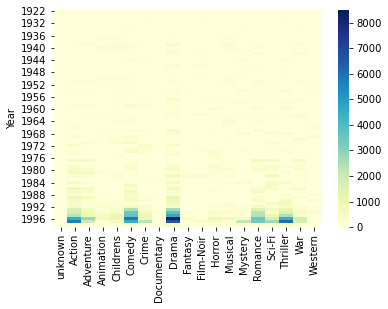

In [82]:
#Heat map distribution genre by year plot with custom color code set
UniRes7 = sns.heatmap(UniRes6, cmap="YlGnBu")


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [81]:
#Your answer here
# new dataframe
UniRes8 = UniRes4
#group by and reset index
UniRes8 = UniRes8.groupby(['movie id']).size().reset_index(name='counts')
#count greater than 100
UniRes8 = UniRes8[UniRes8['counts'] > 100]
#to list the movie id's with than 100 ratings
movie_ids = UniRes8['movie id'].tolist() 

UniRes8 = UniRes4
#group by and average the ratings
UniRes8 = UniRes8.groupby('movie id')['rating'].mean().reset_index(name='mean_ratings')
#sort descending 
UniRes8 = UniRes8.sort_values(by='mean_ratings', ascending=False)
#check ing te movie ids greater than 100 rating
UniRes8 = UniRes8[UniRes8['mean_ratings'].isin(movie_ids)]
#list top 25
UniRes8 = UniRes8[:25]
#merge the movie id's with move titles
UniRes8 = pd.merge(UniRes8, dfi, on = 'movie id')
movie_names = UniRes8['movie title'].tolist() 
#print movies
print(movie_names)




['Farmer & Chase ', 'Killer: A Journal of Murder ', 'Wedding Gift, The ', 'Dial M for Murder ', 'World of Apu, The (Apur Sansar) ', 'Wings of Courage ', 'Window to Paris ', 'Wings of Desire ', 'Damsel in Distress, A ', 'Cosi ', 'Fille seule, La (A Single Girl) ', 'Substance of Fire, The ', 'He Walked by Night ', 'Tokyo Fist ', 'Desert Winds ', 'M ', "Margaret's Museum ", 'Cérémonie, La ', 'Nightwatch ', 'Wonderful, Horrible Life of Leni Riefenstahl, The ', 'Priest ', 'Nico Icon ', 'Celestial Clockwork ', 'Brothers in Trouble ', 'Butcher Boy, The ']


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. 
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.
4. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [108]:

#None of the statements are valid
UniRes9 = UniRes4.groupby('gender').sum()
UniRes9 = dist.filter(items=['gender','Drama', 'Sci-Fi', 'Romance'])
UniRes9['count'] =  UniRes4.groupby('gender').size()
UniRes9 = UniRes9.div(dist['count'], axis=0)
print(UniRes9)



           Drama    Sci-Fi   Romance    count
gender                                       
F       0.427694  0.102145  0.227601  25738.0
M       0.389035  0.136035  0.183198  74253.0


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [1]:
# Men watch more drama than women- false
# Men watch more Romance than women - fase
# Women watch more Sci-Fi than men - false
# 42 percent female watch drama 38 percent males